In [63]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import re
import seaborn as sns

In [64]:
# Pasta contendo os arquivos JSON
pasta_keywords = 'keywords_k'

# Lista para armazenar os DataFrames de cada arquivo
dataframes = []

# Itera sobre os arquivos na pasta
for nome_arquivo in os.listdir(pasta_keywords):
    caminho_arquivo = os.path.join(pasta_keywords, nome_arquivo)

    try:
        # Extrai o valor de k do nome do arquivo
        match = re.search(r'keywords_k=(\d+)', nome_arquivo)
        if match:
            k_value = int(match.group(1))
        else:
            k_value = None

        # Leitura do arquivo JSON com o encoding utf-8-sig
        with open(caminho_arquivo, 'r', encoding='utf-8-sig') as f:
            data = json.load(f)

        # Extrai a lista de itens sob a chave 'items'
        items = data.get('network', {}).get('items', [])

        # Converte para DataFrame
        df = pd.json_normalize(items)

        # Adiciona uma coluna 'k' com o valor extraído do nome do arquivo
        df['k'] = k_value

        # Adiciona o DataFrame à lista
        dataframes.append(df)

        # Conta o número de clusters únicos para cada valor de k
        num_clusters = df['cluster'].nunique()

    except json.JSONDecodeError as e:
        print(f"Erro ao decodificar o JSON em {caminho_arquivo}: {e}")
    except Exception as e:
        print(f"Erro desconhecido em {caminho_arquivo}: {e}")

# Concatena todos os DataFrames em um único DataFrame
df_completo = pd.concat(dataframes, ignore_index=True)

In [65]:
#Ordena o DataFrame por k
df_completo.sort_values(by='k', inplace=True)

In [66]:
# imprimir a cabeça do dataframe
df_completo.head()

,id,label,x,y,cluster,weights.Links,weights.Total link strength,weights.Occurrences,scores.Avg. pub. year,scores.Avg. citations,scores.Avg. norm. citations,k
1044,2045,tocqueville,-0.4663,0.1851,7,6.0,6.0,1.0,2013.0000,3.0,0.4561,1
730,1371,natural selection,-0.2484,0.2384,7,12.0,12.0,3.0,2016.0000,3.0,0.7907,1
731,1373,needs,-0.0819,-0.2440,8,8.0,8.0,1.0,2023.0000,0.0,0.0000,1
732,1374,negotiation,-0.3689,0.6957,26,7.0,7.0,1.0,2018.0000,7.0,2.9371,1
733,1377,neo-institutionalism,-0.2550,-0.4150,3,9.0,10.0,3.0,2016.3333,4.0,0.9920,1


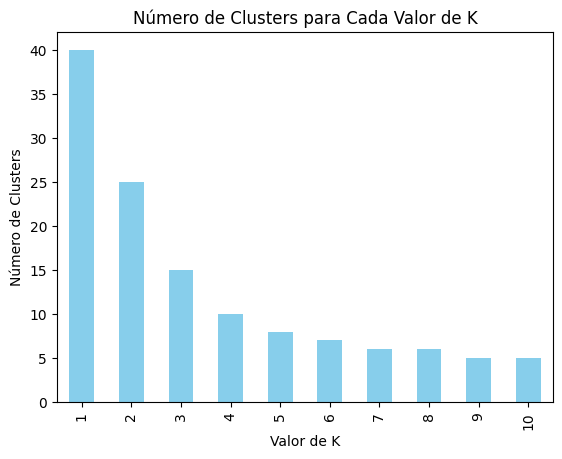

In [67]:
#Plotar com plt o numero de clusters por k sem sns

# Agrupa por k e conta o número de clusters únicos
df_plot = df_completo.groupby('k')['cluster'].nunique()

# Cria um gráfico de barras
df_plot.plot(x='k', y='num_clusters', kind='bar', color='skyblue')

plt.title('Número de Clusters para Cada Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Número de Clusters')
plt.show()

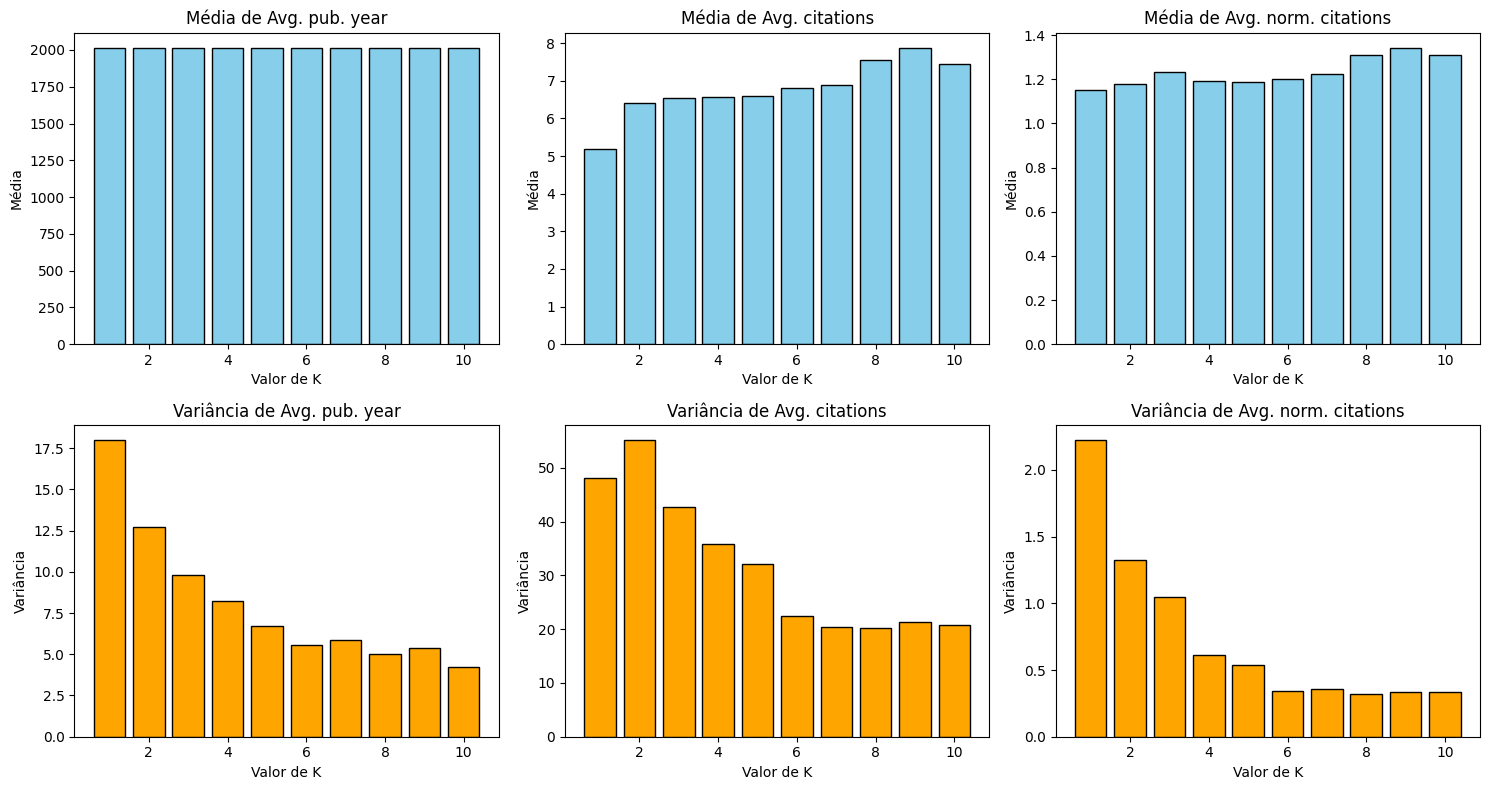

In [68]:
# Lista de scores para os quais você deseja calcular a média e a variância
scores = ['Avg. pub. year', 'Avg. citations', 'Avg. norm. citations']

# Lista para armazenar as médias e variâncias
medias = []
variancias = []

# Calcular a média e a variância para cada score, agrupadas por k
for score in scores:
    media = df_completo.groupby('k')[f'scores.{score}'].mean()
    variancia = df_completo.groupby('k')[f'scores.{score}'].var()

    medias.append(media)
    variancias.append(variancia)

# Cria subplots para médias e variâncias
fig, axs = plt.subplots(nrows=2, ncols=len(scores), figsize=(15, 8))

# Gera histogramas para médias
for i, (score, media) in enumerate(zip(scores, medias)):
    axs[0, i].bar(media.index, media, color='skyblue', edgecolor='black')
    axs[0, i].set_title(f'Média de {score}')
    axs[0, i].set_xlabel('Valor de K')
    axs[0, i].set_ylabel('Média')

# Gera histogramas para variâncias
for i, (score, variancia) in enumerate(zip(scores, variancias)):
    axs[1, i].bar(variancia.index, variancia, color='orange', edgecolor='black')
    axs[1, i].set_title(f'Variância de {score}')
    axs[1, i].set_xlabel('Valor de K')
    axs[1, i].set_ylabel('Variância')

plt.tight_layout()
plt.show()

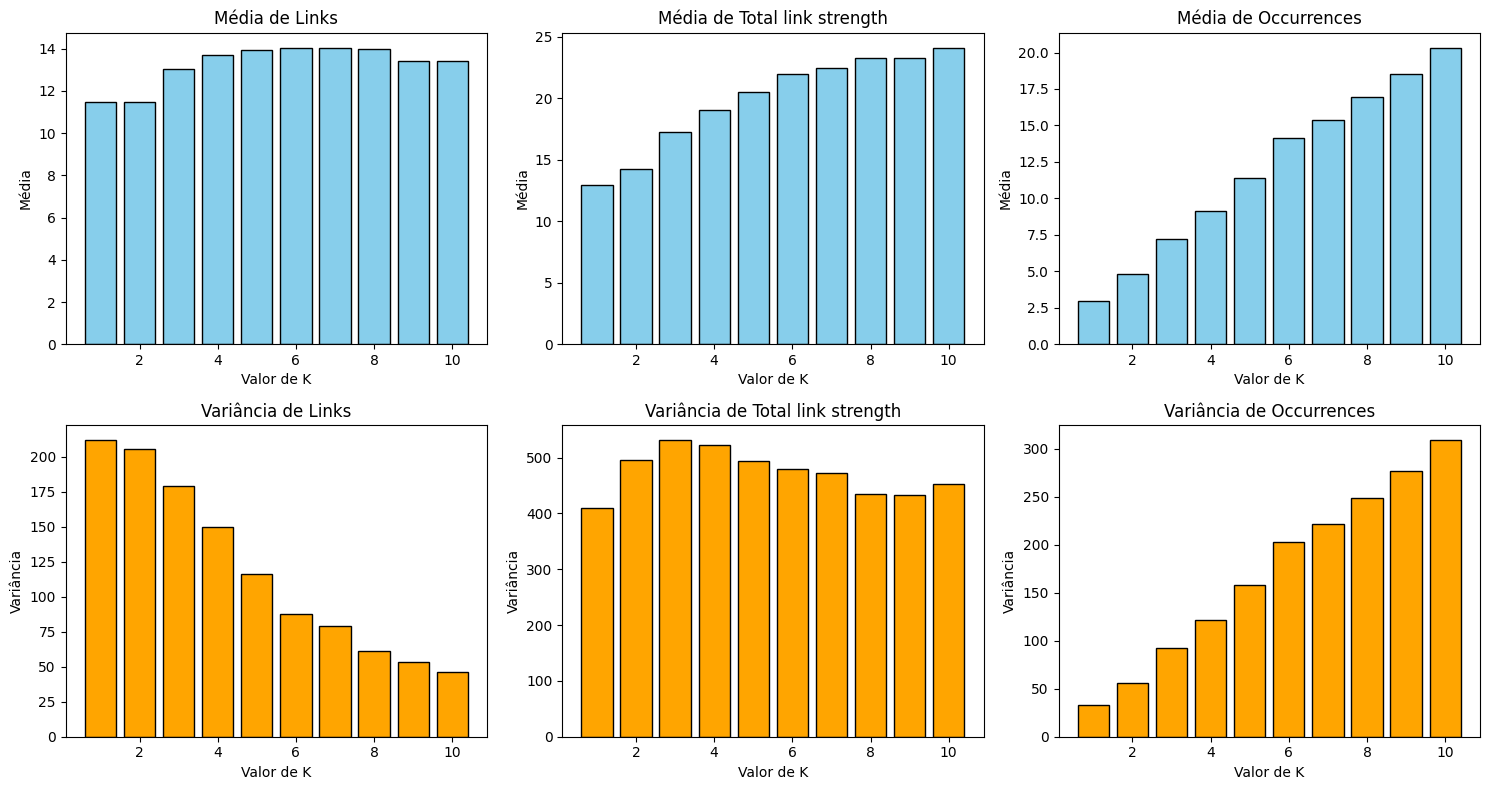

In [69]:
# Lista de scores de weights para os quais você deseja calcular a média e a variância
scores_weights = ['Links', 'Total link strength', 'Occurrences']

# Lista para armazenar as médias e variâncias
medias_weights = []
variancias_weights = []

# Calcular a média e a variância para cada score de weights, agrupadas por k
for score_weight in scores_weights:
    media_weight = df_completo.groupby('k')[f'weights.{score_weight}'].mean()
    variancia_weight = df_completo.groupby('k')[f'weights.{score_weight}'].var()

    medias_weights.append(media_weight)
    variancias_weights.append(variancia_weight)

# Cria subplots para médias e variâncias de weights
fig, axs = plt.subplots(nrows=2, ncols=len(scores_weights), figsize=(15, 8))

# Gera histogramas para médias de weights
for i, (score_weight, media_weight) in enumerate(zip(scores_weights, medias_weights)):
    axs[0, i].bar(media_weight.index, media_weight, color='skyblue', edgecolor='black')
    axs[0, i].set_title(f'Média de {score_weight}')
    axs[0, i].set_xlabel('Valor de K')
    axs[0, i].set_ylabel('Média')

# Gera histogramas para variâncias de weights
for i, (score_weight, variancia_weight) in enumerate(zip(scores_weights, variancias_weights)):
    axs[1, i].bar(variancia_weight.index, variancia_weight, color='orange', edgecolor='black')
    axs[1, i].set_title(f'Variância de {score_weight}')
    axs[1, i].set_xlabel('Valor de K')
    axs[1, i].set_ylabel('Variância')

plt.tight_layout()
plt.show()

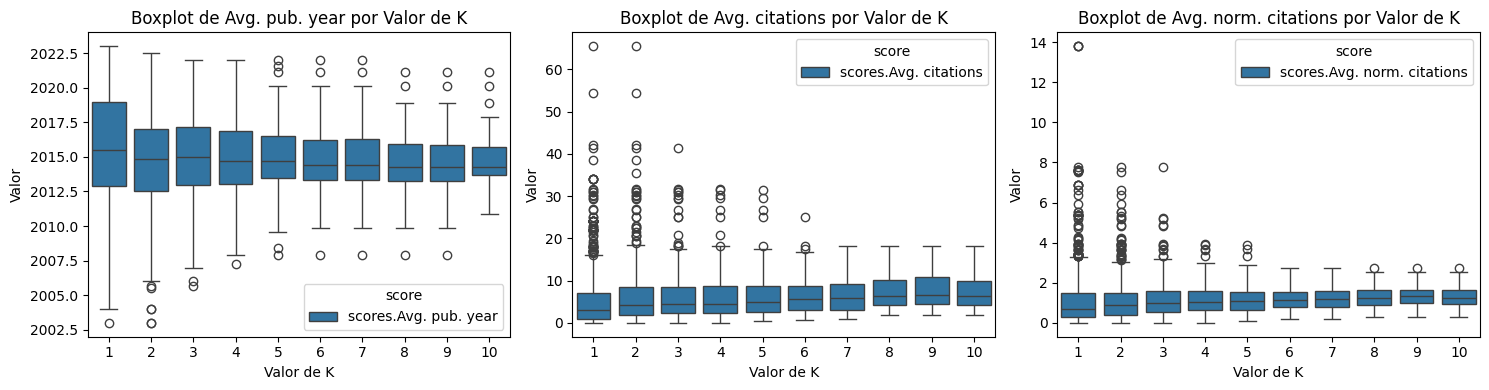

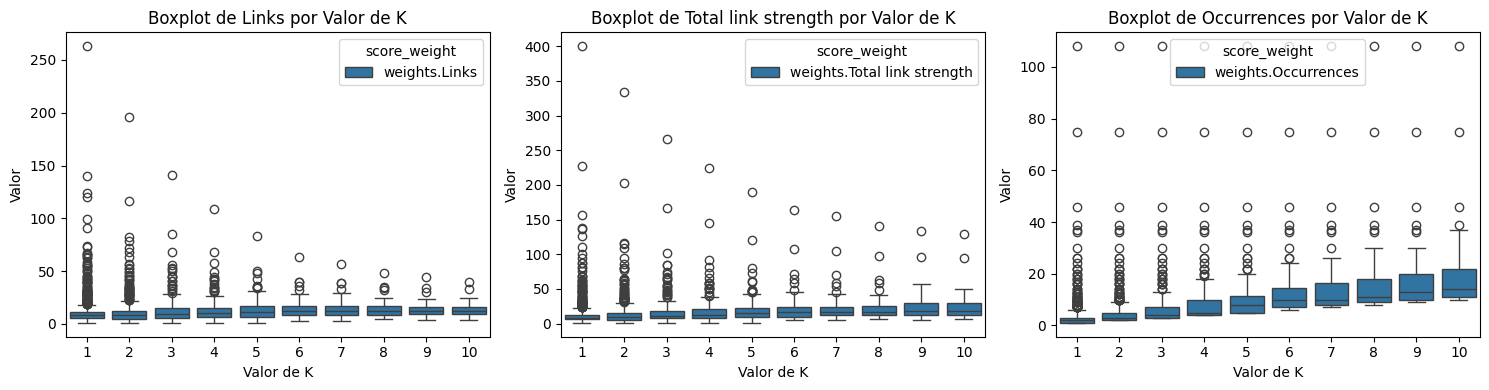

In [70]:
# Cria subplots para boxplots de scores
fig, axs = plt.subplots(nrows=1, ncols=len(scores), figsize=(15, 4))

# Gera boxplots para scores
for i, score in enumerate(scores):
    sns.boxplot(data=df_completo.melt(id_vars=['k'], value_vars=[f'scores.{score}'], var_name='score'), x='k', y='value', hue='score', ax=axs[i])
    axs[i].set_title(f'Boxplot de {score} por Valor de K')
    axs[i].set_xlabel('Valor de K')
    axs[i].set_ylabel('Valor')

plt.tight_layout()
plt.show()

# Cria subplots para boxplots de weights
fig, axs = plt.subplots(nrows=1, ncols=len(scores_weights), figsize=(15, 4))

# Gera boxplots para weights
for i, score_weight in enumerate(scores_weights):
    sns.boxplot(data=df_completo.melt(id_vars=['k'], value_vars=[f'weights.{score_weight}'], var_name='score_weight'), x='k', y='value', hue='score_weight', ax=axs[i])
    axs[i].set_title(f'Boxplot de {score_weight} por Valor de K')
    axs[i].set_xlabel('Valor de K')
    axs[i].set_ylabel('Valor')

plt.tight_layout()
plt.show()